# Modelling

In this notebook, we applied what we know about the data and used the indicators as features to build a model, which would help us to understand what factors will contribute more in happiness. 

### Modelling Result 

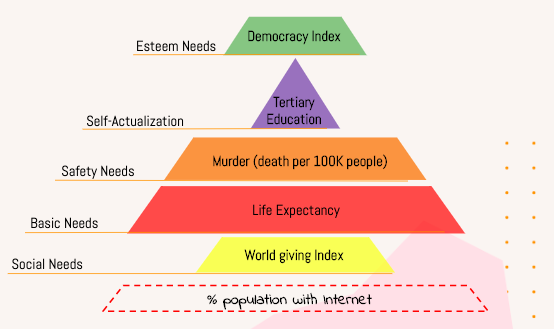

From what our model describes, indicator categorized as social needs have a stronger correlation and impact on happiness than what we assumed. Also it shows the extend of increase in happiness score when the percentage of population enrolling in Tertiary education increases, is bigger than when a nation achieves higher democracy. 



### Modern pyramid of happiness


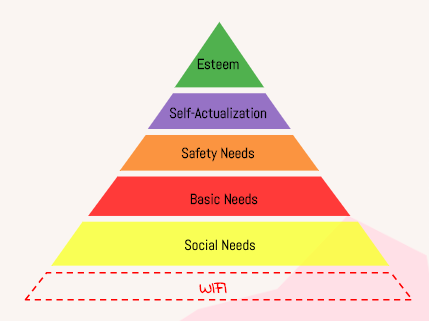


Based on our modelling result, we can basically construct a modern pyramid of happiness. The pyramid suggests that the fulfillment of needs contributing to our happiness will follow the priority below: 

1. Wifi connection
2. Social needs
3. Basic needs
4. Safety needs
5. Self-Actualization 
6. Esteem needs

### Learning

There are for sure a lot of other factors in life that will contribute on our happiness, outside of what are included in the pyramid. Nonetheless, our model could be explained by increase in quality of life and accelerating globalization. Our societies become more stable and suvival needs are mostly fulfilled for the majority of citizens. Increase in globalization adds more distance in our social networks. It's more common nowadays that family and friends live further away. Although we are connected by technology heavily, many researches also reported negative impacts on relationships when we rely on techonology in communications. Therefore, what the model suggests is reasonable, that fulfilling social needs nowadays will bring a citizen more happiness in life. 


### Outline of notebook: 
1. [Data pre-processing](#1.Data-pre-processing)
    - Rescaling
2. [Feature selection](#2.Feature-selection)
    - Try out different feature combinations
3. [Model selection](#3.Modelling)
    - Linear Regression models selection 
4. [Compare Happiness ranking with test result](#4.Compare-actual-happiness-ranking-with-test-result)
    - Which is the happiest country suggested by our model? 
5. [Conclusion & Discussion](#5.Conclusion-and-discussion)

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

Define functions

In [2]:
# Split data to train and test, 
# Function allows us to choose which period of data will be used for training and which year for testing the model

def train_test_split_by_year(df, train_startyear, train_end_year, test_year):
                            
    train_X = df[(df['Year']>=train_startyear) & (df['Year'] <=train_end_year)][id_cols+indicators].reset_index(drop=True)
    train_y = df[(df['Year']>=train_startyear) & (df['Year'] <=train_end_year)][target_col].reset_index(drop=True)

    test_X = df[df['Year']==test_year][id_cols+indicators].reset_index(drop=True)
    test_y = df[df['Year']==test_year][target_col].reset_index(drop=True)

    return train_X,train_y,test_X,test_y

In [3]:
# Rescaling 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(train_X,test_X,features,scaler=StandardScaler,print_min_max=False):
    
    std = scaler()
    print(scaler())
    scaled_fitted = std.fit(train_X[features])
    
    
    if (scaler == MinMaxScaler) and (print_min_max == True):
        i=0
        for feature in features:
            print(f'{feature} min. values:',scaled_fitted.data_min_[i])
            print(f'{feature} max. values:',scaled_fitted.data_max_[i])
            i+=1
    
    scaled = scaled_fitted.transform(train_X[features])
    scaled = pd.DataFrame(scaled, columns=features)

    train_X = train_X.drop(columns=features, axis=1)
    train_X = train_X.merge(scaled, left_index=True, right_index=True, how="inner")


    scaled_test = scaled_fitted.transform(test_X[features])
    scaled_test = pd.DataFrame(scaled_test, columns=features)

    test_X = test_X.drop(columns=features, axis=1)
    test_X = test_X.merge(scaled_test, left_index=True, right_index=True, how="inner")
    
    return train_X,test_X

### 1.Data-pre-processing 

- Split data 
- Rescaling features
    - All the indicators are presented with different scales which may affect the weighing of the indicators. Rescaling will help us to improve the performance of a model. 

In [4]:
# Load combined dataframe
df = pd.read_csv('./data/combined_df.csv')
df.head()

,Year,Continent,Region,Country,Happiness Rank,Happiness Score,Income(GDP),Covered health expense,Life Expectancy,Murder(death per 100K people),World giving index,Civil Liberties Index,Gender Inequality,Democracy Index,Tertiary Education,Internet Access
0,2014,Europe,Western Europe,Switzerland,1,7.587,61902.162406,63.230273,83.197561,0.5,47.0,1.0,32.2,90.9,57.22972,87.40
1,2014,Europe,Northern Europe,Iceland,2,7.561,45714.893812,80.499408,82.860976,0.6,50.0,1.0,27.1,95.8,81.43798,98.16
2,2014,Europe,Northern Europe,Denmark,3,7.527,47901.447363,84.189528,80.700000,1.3,47.0,1.0,28.2,91.1,81.02908,95.99
3,2014,Europe,Northern Europe,Norway,4,7.522,66015.440300,85.288937,82.100000,0.6,48.0,1.0,26.8,99.3,77.54350,96.30
4,2014,America,Northern America,Canada,5,7.427,45645.564297,73.535852,81.800000,1.5,60.0,1.0,32.2,90.8,65.61291,87.12


In [5]:
# Separate columns with metadata and features as well as target variable
id_cols = ['Year','Country','Continent','Region']
target_col = 'Happiness Score'
indicators = [col for col in df.columns.tolist() 
              if col not in ['Year','Country','Continent','Region',
                             'Happiness Rank','Happiness Score']]

In [6]:
# Usee Min Max Normalization  

# train data: from 2014 - 2017
# test data: 2018 
 
train_X_14_17, train_y_14_17, test_X_18, test_y_18 = train_test_split_by_year(df, 2014,2017,2018)
train_X_14_17, test_X_18 = feature_scaling(train_X_14_17, test_X_18, indicators, MinMaxScaler,print_min_max=True)

MinMaxScaler(copy=True, feature_range=(0, 1))
Income(GDP) min. values: 715.032744745509
Income(GDP) max. values: 124609.304140088
Covered health expense min. values: 4.9602580000000005
Covered health expense max. values: 86.74301674
Life Expectancy min. values: 49.89100000000001
Life Expectancy max. values: 84.099756097561
Murder(death per 100K people) min. values: 0.2
Murder(death per 100K people) max. values: 105.4
World giving index min. values: 11.0
World giving index max. values: 70.0
Civil Liberties Index min. values: 1.0
Civil Liberties Index max. values: 7.0
Gender Inequality min. values: 24.8
Gender Inequality max. values: 63.1
Democracy Index min. values: 14.3
Democracy Index max. values: 99.3
Tertiary Education min. values: 3.2513
Tertiary Education max. values: 136.60257
Internet Access min. values: 1.248675689
Internet Access max. values: 100.0


## 2.Feature-selection

Let's first investigate the impact of individual indicator on happiness score

In [7]:
# Look at individual regression coef for each indicator
indicators = [col for col in df.columns.tolist() 
              if col not in ['Year','Country','Continent','Region',
                             'Happiness Rank','Happiness Score']]

for indicator in indicators:

    X = df[indicator]
    y = df[target_col]

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    print(est.fit().summary(),'\n')
    print('--------------------------\n')

/Users/ivyip/miniconda3/envs/ironhack/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     701.2
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          4.28e-109
Time:                        14:52:01   Log-Likelihood:                -895.88
No. Observations:                 739   AIC:                             1796.
Df Residuals:                     737   BIC:                             1805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6140      0.042    109.884      

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1194.
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          2.77e-156
Time:                        14:52:01   Log-Likelihood:                -787.05
No. Observations:                 739   AIC:                             1578.
Df Residuals:                     737   BIC:                             1587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7921      0.053     

We now know which indicator correlates with happiness score more individually and can rank them: 
1. Income(GDP)
2. Life Expectancy
3. Tertiary Education (% of population enrolled in Tertiary Education)
4. Internet coverage
5. Covered Health Expense
6. Democracy Index
7. World giving index
8. Civil Liberties Index
9. Gender Inequity 
10. Murder rate

### Try out different feature combinations

Previously we found out two sets of features with suspected multicolinearity: 
1. Income, Covered health expense and Life Expectancy
2. Civil Liberties Index and Democracy Index

Our questions:  
1. What factors contribute more on happiness?
2. Will the ranking of the impact from these factors follow the priority indicated in the pyramid of needs? 

To answer our questions, we will make sure at least one feature will be selected for each category, also to avoid using features with multicolinearity in a model. 

In [8]:
# Separate indicators according to our categorization based on Maslow's pyramid of needs 

basic = ['Covered health expense','Life Expectancy','Income(GDP)']
safety = ['Murder(death per 100K people)']
social = ['World giving index']
esteem = ['Civil Liberties Index','Gender Inequality','Democracy Index']
self_actual = ['Tertiary Education']
internet = ['Internet Access']

# Define a function to try out all the combinations, return the OLS summary of each model
def test_features(train_X,train_y):
    for i in internet: 
        for b in basic: 
            for s in safety:
                for so in social:
                    for e in esteem:
                        for sa in self_actual:

                            features = [sa,e,so,s,b,i]
                            print(features)
                           
                            X = train_X[features]
                            y = train_y

                            X2 = sm.add_constant(X)
                            est = sm.OLS(y, X2)
                            print(est.fit().summary(),'\n')
                            print('--------------------------\n')
                

In [9]:
test_features(train_X_14_17,train_y_14_17)

['Tertiary Education', 'Civil Liberties Index', 'World giving index', 'Murder(death per 100K people)', 'Covered health expense', 'Internet Access']
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     262.7
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          3.01e-162
Time:                        14:52:01   Log-Likelihood:                -531.25
No. Observations:                 591   AIC:                             1076.
Df Residuals:                     584   BIC:                             1107.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          6.97e-164
Time:                        14:52:01   Log-Likelihood:                -527.43
No. Observations:                 591   AIC:                             1069.
Df Residuals:                     584   BIC:                             1100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Two feature combinations with the lowerest p-values and highest r2 score:
1. r2 score: 0.730, Features: `Tertiary Education`, `Civil Liberties Index`, `World giving index`, 
   `Murder(death per 100K people)`,`Covered health expense`, `Internet Access`
    <br/>
   
2. r2 score: 0.734, Features: `Tertiary Education`,`Democracy Index`,`World giving index`,
    `Murder(death per 100K people)`,`Covered health expense`, `Internet Access`
   
All p-values in both models are lower than 0.05. With the common significance level (alpha=5%), we can reject the null hypothesis for these two models. We will select the second model since all the p-values are close to zero. 

### 3.Modelling

In [10]:
# define a function to print out the r2_score and regression coefficient 

def modelling(train_X,train_y,test_X,test_y,features,model=LinearRegression(normalize=True)):
    clf = model
    clf.fit(train_X[features],train_y)
    pred_y = clf.predict(test_X[features])
    print(f'{model}\n')
    print('r2_score: ',r2_score(test_y,pred_y))
    print('Coefficient', clf.coef_)
    print('----------\n')
    return pred_y

In [11]:
# Use selected features: 
selected_features = ['Tertiary Education', 'Democracy Index', 'World giving index', 
            'Murder(death per 100K people)', 'Covered health expense']


linear = LinearRegression(normalize=True)
ridge = Ridge()
lasso = Lasso()

for model in [linear,ridge,lasso]: 
    modelling(train_X_14_17,train_y_14_17, test_X_18,test_y_18,selected_features,model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

r2_score:  0.6557584482392469
Coefficient [1.49514625 0.68913751 1.38877971 0.63691549 1.81413467]
----------

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

r2_score:  0.6572580479505594
Coefficient [1.43390034 0.73180284 1.32690281 0.52884823 1.78495595]
----------

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

r2_score:  -0.0026535109708507587
Coefficient [ 0.  0.  0. -0.  0.]
----------



Comparing three models, Ridge linear regression gives us the best r2 score. 

### 4.Compare-actual-happiness-ranking-with-test-result

In [12]:
hs_18_predict = modelling(train_X_14_17,train_y_14_17, test_X_18,test_y_18,features,ridge)
hs_18_predict = pd.DataFrame(hs_18_predict)
hs_18_predict.columns = ['2018 Prediction']
hs_18_predict

NameError: name 'features' is not defined

In [ ]:
predict_18 = (test_X_18[['Country','Continent']]
             .merge(hs_18_predict,how='inner',right_index=True,left_index=True)
             .sort_values(by='2018 Prediction',ascending=False)
             .reset_index(drop=True))

In [ ]:
predict_18['Happiness Rank'] = [rank+1 for rank in predict_18.index.tolist()]
predict_18.head(10)

In [ ]:
actual_18 = (df[df['Year']==2018]
             [['Year','Country','Happiness Rank','Continent','Happiness Score']]
             .set_index('Happiness Rank')
             .reset_index(drop=True))
actual_18['Happiness Rank'] = [rank+1 for rank in actual_18.index.tolist()]
actual_18

In [ ]:
# Compaison
compare_rank = actual_18.merge(predict_18,how='inner',left_on='Happiness Rank',
                       right_on='Happiness Rank').set_index('Happiness Rank')

compare_rank.head(10)

As our model suggested, the happiest country will be Norway, followed by New Zealand and United States. 

### 5.Conclusion-and-discussion

To answer our questions, we will look at the regression coefficient for each indicators.

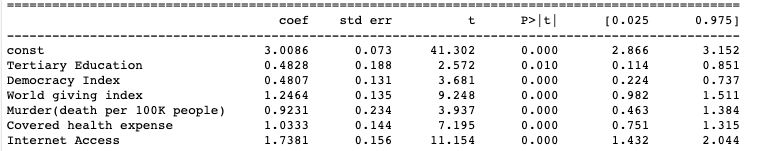

#### What factors contribute more on happiness?
    - Based on the model we built, the impact of the factors on happiness follows the following sequence: 
        1. Internet Access
        2. World giving index (how active a citizen is in a society) 
        3. Covered health expense
        4. Murder rate
        5. Tertiary Education
        6. Democracy Index

#### Will the ranking of the impact from these factors follow the priority indicated in the pyramid of needs? 
    - As our model suggested, the priority is different from Maslow's pyramid of needs.  
        1. Internet 
        2. Social Needs 
        3. Basic Needs
        4. Safety Needs
        5. Self-actualization
        6. Esteem Needs

### Discussion
1. Murder rate was suggested in our model as positively correlated to happiness score which seems to be abnormal. Simpson's Paradox appeared which is a phenomenon, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.<br/> The paradox can be resolved when causal relations are appropriately addressed in the statistical modeling. 

2. The challenge of this topic is that most of the indicators have underlying correlations with each other and the model may create misleading results. To continue the research, we need to investigate deeper and have a better understanding on the causal relations of each factors.